
<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos alternativos de clasificación

## Naïve Bayes

### Teorema de Bayes

En estadística se conoce como el __*Teorema de Bayes*__ a la regla que relaciona la probabilidad de que ocurra un evento, basado en el conocimiento previo de que otro evento ha ocurrido.

El ejemplo más típico es conocer si un individuo tiene una cierta enfermedad cuando presenta un determinado síntoma. Si tenemos en cuenta está información podremos estimar la probabilidad de que realmente sufra la enfermedad que tomando un individuo típico de la población.

<img src ="https://oracleaide.files.wordpress.com/2012/12/ovals_pink_and_blue1.png" width="400px"></img>

La ecuación que describe el *Teorema de Bayes* es la siguiente.

$P(A|B)=\frac{P(B|A) P(A)}{P(B)}$

- $P(A)$ Es la probabilidad, o creencia que se tiene de que $A$ sea verdadero antes de conocer más información. Tambien se le llama __*prior*__.

- $P(A|B)$ Es la probabilidad o creencia que se tiene de que $A$ sea verdadero una vez sabemos que $B$ es verdadero, por ello se suele llamar __*posterior*__.

- El término $P(B|A)$ se denomina también *likelihood* y representa la probabilidad de que se de el evento $B$, sabiendo que $A$ es verdadero.

- Por último $P(B)$ (también se llama __*evidence*__) es la probabilidad de que ocurra $B$ en la población general.

#### Ejemplo

Supongamos que se hace un estudio de cierta enfermedad sobre una muestra de la población general y se obtienen los siguientes resultados:

||POSITIVOS|NEGATIVOS| TOTAL
|---|---|---||
|**CON FIEBRE**|66|184|250|
|**SIN FIEBRE**|34|9,716|9,750|
|**TOTAL**|100|9,900|10,000|

Utilizando la notación anterior podemos suponer que el evento $A$, es ser positivo en la enfermedad.

En tal caso tenemos que:

- $P(A)$, la probabilidad de ser positivo, sería el número de positivos sobre el total de la población, es decir, 100 / 10,000.

- $P(B|A)$ sería la probabilidad de tener fiebre, sabiendo que se es positivo, es decer el número de individuos con fiebre del total de positivos, en este casao 66 / 100.

- Por último $P(B)$ sería la probabilidad de tener fiebre con respecto al total de individuos: 250 / 10,000.

Si calculamos por tanto la probabilidad de ser positivo, sabiendo que un individuo tiene fiebre aplicando el teorema de bayes tenemos que:

In [ ]:
P_A = 100 / 10_000 # Prior
P_BA = 66 / 100 # Likelihood
P_B = 250 / 10_000 # Evidence

# Teorema de Bayes
P_AB = P_A * P_BA / P_B

print(f"La probabilidad de que un individuo sea positivo si tiene fiebre es del {P_AB * 100:.2f}%")

La probabilidad de que un individuo sea positivo si tiene fiebre es del 26.40%


### Asunción _"Naïve"_

Hasta ahora estabamos considerando que teníamos un único evento binario (una variable binaria a clasificar), así como una única variable explicativa también binaria.

Una forma más general del Teorema de Bayes es la siguiente:

$P(y|x_1, x_2, ..., x_n)= \frac{P(y) P(x_1, x_2, ..., x_n | y)}{P(x_1, x_2, ..., x_n)}$

El método *Naïve Bayes* representa un conjunto de algorítmos utilizados en clasificación supervisada que aplican el teorema de Bayes suponiendo que cada una de las variables que explican la variable dependiente son independientes entre sí.

$P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod^n_{i=1} P(x_i|y)}{P(x_1, x_2, ..., x_n)}$

Recoredemos que la probabilidad de que dos eventos independientes entre sí ocurran simultaneamente es el producto de la probabilidad de que ocurra cada uno de ellos por separado.

Por lo tanto asumir la independencia de las variables independientes supone que podemos aplicar el *Teorema de Bayes* simple a cada una de las varibles, multiplicando el resultado para obtener la probabilidad final.

Para simplificar todavía más el modelo, el denominador o "evidencia" se omite, ya que es constante para cada una de las muestras individuales que se quiere clasificar.

Así, la probabilidad es proporcional a el producto del *prior* y el *likelihood*.

$P(y|x_1, x_2, ..., x_n) \propto P(y)\prod^n_{i=1} P(x_i|y)$

Finalmente, y teniendo en cuenta esta consideración, clasificaremos cada una de las muestras como la clase que tenga el mayor producto del prior y el *likelihood*.

A continuación veremos algunos ejemplos para aclarar estos conceptos.

### Clasificadores Naïve Bayes

La __diferencia fundamental__ entre los distintos clasificadores *Naive Bayes* es la asunción que hacen sobre la __distribución de los datos de las variables__ independientes.

#### Gaussian Naive Bayes

El clasificador *Gaussian Naive Bayes* se utiliza cuando las variables independientes pueden ser modelizadas por distribuciones *gaussianas*.

$P(x_i|y) = \frac{1}{\sqrt{2\pi \sigma_y^2 }}\exp(-\frac{(x_i - \mu_i)^2}{2\sigma^2_y})$

Los parametros $\sigma$ y $\mu$ son estimados a partir de los datos de entrenamiento.

*Recordatorio: Probabilidad vs Likelihood*

<img width = "400px" src="https://miro.medium.com/max/875/1*F_34lcOq-XnaSx0dsHmqQw.png"></img>

##### Ejemplo

Para ilustrar el funcionamiento del clasificador, vamos a hacer un ejemplo con el archiconocido dataset `iris`.

Para ello cargamos los datos desde el módulo `sklearn.datasets` de scikit-learn, que tiene varios datasets de ejemplo muy utilizados.

In [ ]:
def bunch_to_dataframe(dataset, target_name = "target"):
  """ Utilidad para transformar un objeto 'Bunch' en dataframe.
  """
  df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
  df[target_name] = dataset.target_names[dataset.target]
  return df

In [ ]:
# Importamos las librerías necesarias.
from sklearn.datasets import load_iris

# Cargamos el dataset en memoria
dataset = load_iris()

# Convertimos en un dataframe de pandas para manejar mejor los datos.
df = bunch_to_dataframe(dataset, "Especie")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vamos a visualizar, a continuación, la distribución de las variables independientes, y como el algorítmo asume que tienen una distribución normal para hacer los cálculos.

In [ ]:
from scipy.stats import norm

def plot_normal_distributions(df, feature_names, target_name):
  """ Realiza una visualizacion de las variables del dataset incluyendo un ajuste
  a una distribucion Gaussiana.
  Args:
    df (pd.DataFrame): DataFrame de pandas con los datos.
    feature_names (List[str]): Lista con las variables a visualizar.
    target_name (str): Nombre de la variable objetivo.
  """
  # Para cada una de las variables independientes
  for feature in feature_names:

    # Generamos una figura.
    fig, ax = plt.subplots(figsize=(10, 3))
    ax_2 = ax.twinx() # Generamos un Y eje secundario

    # Ponemos el título al gráfico.
    ax.set_title(feature)
    ax_2.set_ylabel("Likelihood")
    ax.set_ylabel("Count")

    # Para cada una de las clases del dataset
    for target in df[target_name].unique():

      # Seleccionamos la variable y pintamos el histograma
      x = df.loc[df[target_name] == target, feature]
      ax.hist(x, density=False, label = target, alpha = 0.3, bins=50)

      # Calculamos los parametros de una distribución normal y la pintamos.
      normal_dist = norm(*norm.fit(x))
      zx = np.linspace(x.min(), x.max(), num=100)
      z = normal_dist.pdf(zx)
      ax_2.plot(zx, z)

    # Incluimos la leyenda
    ax.legend()
    plt.show()


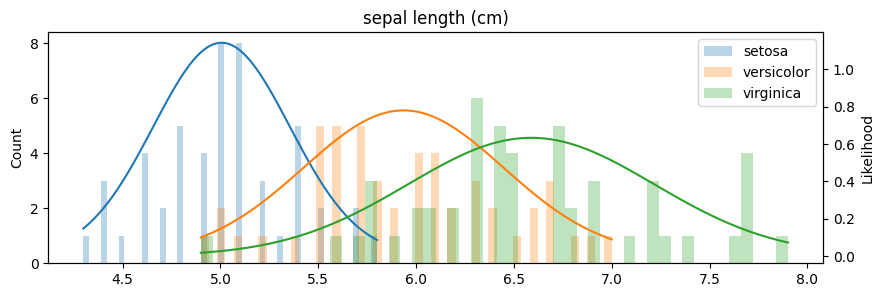

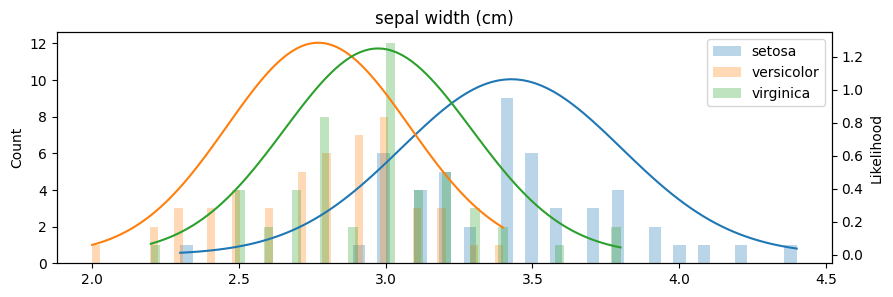

In [ ]:
plot_normal_distributions(
    df, ["sepal length (cm)",	"sepal width (cm)"],
    target_name = "Especie"
)

En este caso, considerando únicamente las variables `sepal_length` y `sepal_width` el algoritmo realizaría el siguente proceso para clasificar una muestra con, por ejemplo, los valores `sepal_length = 7.0` y `sepal_width = 3.2`


El *prior* lo estimamos a partir del número de muestras que hay en el dataset completo de esta clase en particular. En el dataset `iris` sabemos que hay 150 muestras, de las cuales 50 son de cada clase, por lo tanto la probabilidad sera del 33.33% para cada una.

$P(y=setosa)$ = 0.33

Para saber el *likelihood* con respecto a cada variable pordemos entrar en los gráficos de arriba y obtener su valor. A ojo podemos calcular:



$P(sepal\_length=7.0|y=setosa) = 0.001$

$P(sepal\_width=3.2|y=setosa) = 0.8$

Por lo tanto el valor que le otorga el modelo a está clase será:

$P(y=setosa|sepal\_length=7.0,sepal\_width=3.2)\propto 0.33 \cdot 0.001 \cdot 0.8 = 0.000264$

Si reproducimos el mismo proceso para las otras dos clases tenemos que:

$P(y=versicolor|sepal\_length=7.0,sepal\_width=3.2)\propto 0.33 \cdot 0.1 \cdot 0.6 = 0.0198$

$P(y=virginica|sepal\_length=7.0,sepal\_width=3.2)\propto 0.33 \cdot 0.5 \cdot 1.1 = 0.181$

En los tres casos, el denominador o evidencia, sería el mismo $P(sepal\_length=7.0,sepal\_width=3.2)$ con lo cual no es necesario calcularlo y podemos concluir que lo más probable es que la muestra provenga de la variedad `virginica` ya que es la que mayor score a obtenido.


##### Gaussian Naïve Bayes en scikitlearn

Afortunadamente, el algoritmo está implementado en la librería `scikit-learn` en el módulo `sklearn.naive_bayes`.

El algorítmo sigue la *API* común de scikit-learn con un constructor que toma como argumento los hiperparámetros (en este caso sólo acepta el parámetro `prior` por si se quiere especificar un prior distinto al que se infiere de los datos).

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

Podemos, a continuación, entrenar el modelo y evaluar su accuracy.

In [ ]:
# Obtenemos los datos del dataset en forma matricial.
X = dataset.data
y = dataset.target

# Dividimos el dataset en entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.20, random_state = 0, stratify=y)

# Construimos el modelo y lo etrenamos con el método fit
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predecimos con el estimador entrenado
y_pred_train = gnb.predict(X_train)
y_pred = gnb.predict(X_val)

# Calculámos el accuray en entrenamiento y en validación
acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print(f"Accuracy train: {acc_train * 100:.2f}%")
print(f"Accuracy val: {acc_train * 100:.2f}%")

Accuracy train: 95.00%
Accuracy val: 95.00%


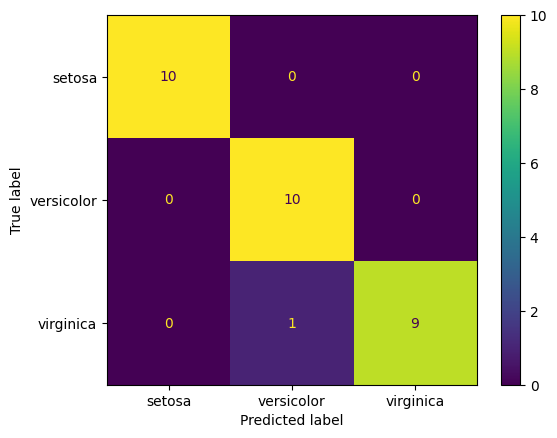

In [ ]:
y_val_pred = gnb.predict(X_val)

cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)

disp.plot()
plt.show()

##### Ejercicio

* Utilizar un clasificador `GaussianNB` para entrenar un modelo que prediga si un tumor es maligno o benigno utilizando el dataset `breast_cancer` del módulo `sklearn.datasets`.

* Dar una estimación del accuracy del modelo.

* Calcular la matriz de confusión y razonar si sería un modelo aceptable para utilizar en el diagnóstico.

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
df = bunch_to_dataframe(dataset, "type")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


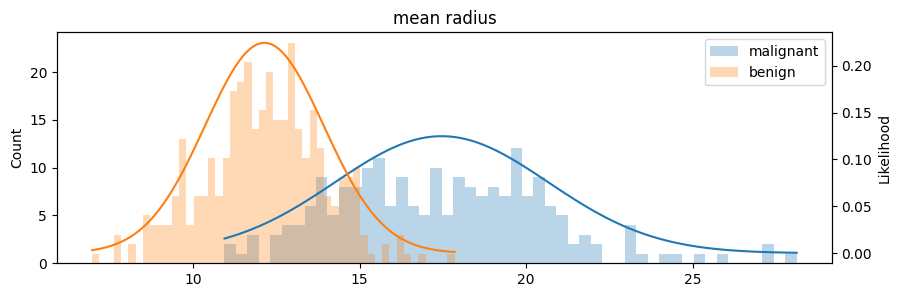

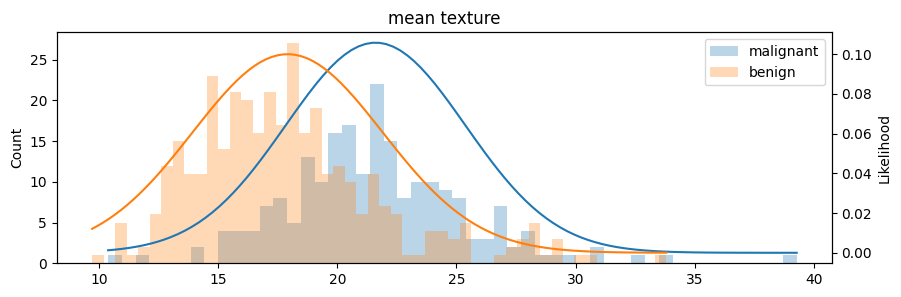

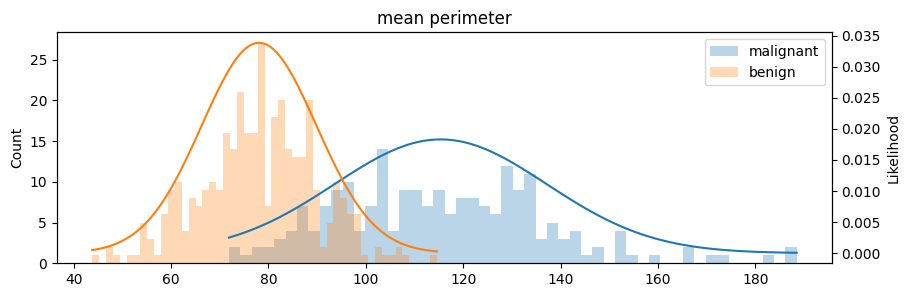

In [ ]:
plot_normal_distributions(
    df,
    ["mean radius", "mean texture", "mean perimeter"],
    "type"
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Obtenemos los datos del dataset en forma matricial.
X = dataset.data
y = dataset.target

# Dividimos el dataset en entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.20, random_state = 0, stratify=y)

# Construimos el modelo y lo entrenamos con el método fit
#gnb = GaussianNB(priors=None).fit(X_train, y_train)

gnb = Pipeline([
  ('escala', MinMaxScaler(feature_range=(0, 1))),
  ('modelo', GaussianNB())
])

gnb.fit(X_train, y_train)

# Predecimos con el estimador entrenado
y_pred_train = gnb.predict(X_train)
y_pred = gnb.predict(X_val)

# Calculámos el accuray en entrenamiento y en validación
acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print(f"Accuracy train: {acc_train * 100:.2f}%")
print(f"Accuracy val: {acc_val * 100:.2f}%")

Accuracy train: 93.63%
Accuracy val: 90.35%


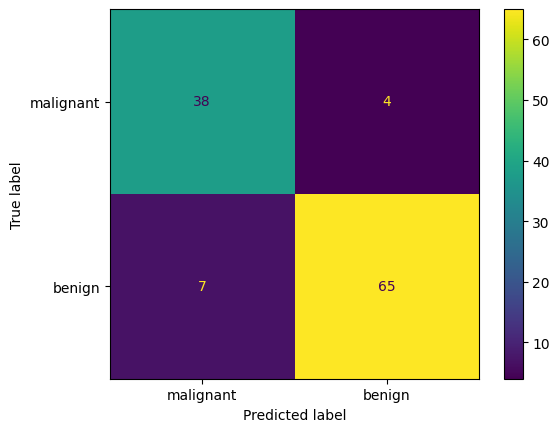

In [ ]:
y_val_pred = gnb.predict(X_val)

cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)

disp.plot()
plt.show()

 #### Multinomial Naive Bayes

El clasificador *Multinomial Naive Bayes* asume que la distribución de las variables es multinomial. Su caso de uso típico es la clasificación de documentos o los sistemas de detección de *spam*.

Para cada una de las clases, la distribución queda determinada por unos paramétros que representan la probabilidad de que una palabra $i$ se encuentre en la muestra de una determinada clase.



$\theta_{iy}=\frac{N_{iy} + \alpha}{N_{y} + n \alpha}$

##### Ejemplo

Como antes, vamos a ver un ejemplo práctico.

En este caso vamos a utilizar un dataset en el que cada muestra es un e-mail que discute un tema en particular. El objetivo es clasificar de que tema se esta hablando a partir del texto.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Por simplicidad, nos limitamos a utilizar cuatro categorias.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Descargamos los datos.
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=0)

In [ ]:
for i, instance in enumerate(twenty_train.data[:3]):
  print(f"\nSample {i+1}")
  print(f"--------")
  print(f"{instance[:500]}...")


Sample 1
--------
From: reedr@cgsvax.claremont.edu
Subject: Re: DID HE REALLY RISE???
Organization: The Claremont Graduate School
Lines: 29

In article <Apr.9.01.11.16.1993.16937@athos.rutgers.edu>, emery@tc.fluke.COM (John Emery) writes:
> The one single historic event that has had the biggest impact on the
> world over the centuries is the resurrection of Jesus.  At the same
> time, it is one of the most hotly contested topics....
> 
> Did Jesus Christ really rise from the dead?  Since the eyewitnesses
> are no...

Sample 2
--------
From: hudson@athena.cs.uga.edu (Paul Hudson Jr)
Subject: Re: Homosexuality issues in Christianity
Organization: University of Georgia, Athens
Lines: 35

In article <May.6.00.35.17.1993.15441@geneva.rutgers.edu> loisc@microsoft.com (Lois Christiansen) writes:
>In article <Apr.30.03.11.27.1993.10101@geneva.rutgers.edu> FSSPR@acad3.alaska.edu wrote:

>You might visit some congregations of Christians, who happen to be homosexuals,
>that are spirit-filled bel

Antes de aplicar ningún algoritmo, tenemos que crear un dataset. Para ello utilizamos la utilidad `CountVectorizer` de scikit-learn.

Con ello convertiremos cada muestra en un vector, que tendrá por columnas cada una de las palabras del dataset y las veces que aparecen representadas en la muestra.

Para no complicar el ejemplo, vamos a limitarnos a un máximo vocabulario de 30 palabras, y vamos a quitar aquellas que aparezcan en más del 20% de los e-mails, ya que probablemente se trate de palabras comunes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50, max_df=0.1)

vectorizer.fit(twenty_train.data)

X = vectorizer.transform(twenty_train.data).todense()

In [ ]:
df = pd.DataFrame(data = X, columns = vectorizer.vocabulary_)
df["class"] = np.array(twenty_train.target_names)[twenty_train.target]
df.head()

,john,christ,man,data,religion,book,others,evidence,cannot,faith,...,her,state,hell,pitt,sgi,20,available,file,msg,class
0,0,0,0,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,soc.religion.christian
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,soc.religion.christian
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.med
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,15,0,0,0,2,soc.religion.christian
4,0,0,0,0,0,0,0,3,0,0,...,0,0,0,3,0,0,1,0,0,alt.atheism


In [ ]:
df = df.groupby("class").sum()
df.head()

,john,christ,man,data,religion,book,others,evidence,cannot,faith,...,she,her,state,hell,pitt,sgi,20,available,file,msg
class,,,,,,,,,,,,,,,,,,,,,
alt.atheism,20,39,64,309,310,16,43,118,122,15,...,183,57,13,85,213,79,162,46,60,128
comp.graphics,82,70,138,0,0,203,191,77,18,0,...,113,0,258,42,156,0,146,165,220,24
sci.med,164,132,32,0,0,100,44,46,34,0,...,2,225,59,80,120,13,54,81,40,38
soc.religion.christian,112,83,69,17,77,20,49,121,139,375,...,1,180,9,93,23,281,66,26,17,140


Calculamos las probabilidades de que cada palabra aparezca en una determinada clase.

In [ ]:
for word in df.columns:
  df[word] = df[word] / df.sum(axis = 1).values
df.head()

,john,christ,man,data,religion,book,others,evidence,cannot,faith,...,she,her,state,hell,pitt,sgi,20,available,file,msg
class,,,,,,,,,,,,,,,,,,,,,
alt.atheism,0.004520,0.008854,0.014659,0.071827,0.077634,0.004344,0.011726,0.032559,0.034795,0.004432,...,0.178118,0.067489,0.016505,0.109724,0.308795,0.165588,0.406776,0.194371,0.314375,0.975841
comp.graphics,0.017807,0.015476,0.030990,0.000000,0.000000,0.047044,0.046448,0.019637,0.004682,0.000000,...,0.100415,0.000000,0.254833,0.055653,0.218875,0.000000,0.262139,0.401247,0.892065,0.872379
sci.med,0.046054,0.038857,0.009801,0.000000,0.000000,0.030930,0.014043,0.014891,0.011173,0.000000,...,0.002803,0.316222,0.121190,0.186933,0.344680,0.056894,0.250522,0.500616,0.491996,0.909234
soc.religion.christian,0.020468,0.015485,0.013076,0.003264,0.014833,0.003911,0.009619,0.023984,0.028228,0.078368,...,0.001194,0.215106,0.013698,0.143513,0.041429,0.527986,0.262177,0.139784,0.106157,0.977334


In [ ]:
probabilities = pd.DataFrame(
    index = df.index,
    columns = df.columns,
    data = df.values / df.sum(axis = 1).values.reshape(4, -1)
)
probabilities

,john,christ,man,data,religion,book,others,evidence,cannot,faith,...,she,her,state,hell,pitt,sgi,20,available,file,msg
class,,,,,,,,,,,,,,,,,,,,,
alt.atheism,0.001090,0.002136,0.003537,0.017329,0.018730,0.001048,0.002829,0.007855,0.008395,0.001069,...,0.042974,0.016283,0.003982,0.026473,0.074501,0.039951,0.098141,0.046895,0.075848,0.235437
comp.graphics,0.004062,0.003531,0.007070,0.000000,0.000000,0.010733,0.010596,0.004480,0.001068,0.000000,...,0.022908,0.000000,0.058137,0.012696,0.049933,0.000000,0.059803,0.091539,0.203512,0.199021
sci.med,0.009793,0.008263,0.002084,0.000000,0.000000,0.006577,0.002986,0.003166,0.002376,0.000000,...,0.000596,0.067243,0.025770,0.039750,0.073295,0.012098,0.053272,0.106454,0.104621,0.193345
soc.religion.christian,0.004845,0.003666,0.003095,0.000773,0.003512,0.000926,0.002277,0.005678,0.006683,0.018552,...,0.000283,0.050923,0.003243,0.033975,0.009808,0.124993,0.062066,0.033092,0.025131,0.231369


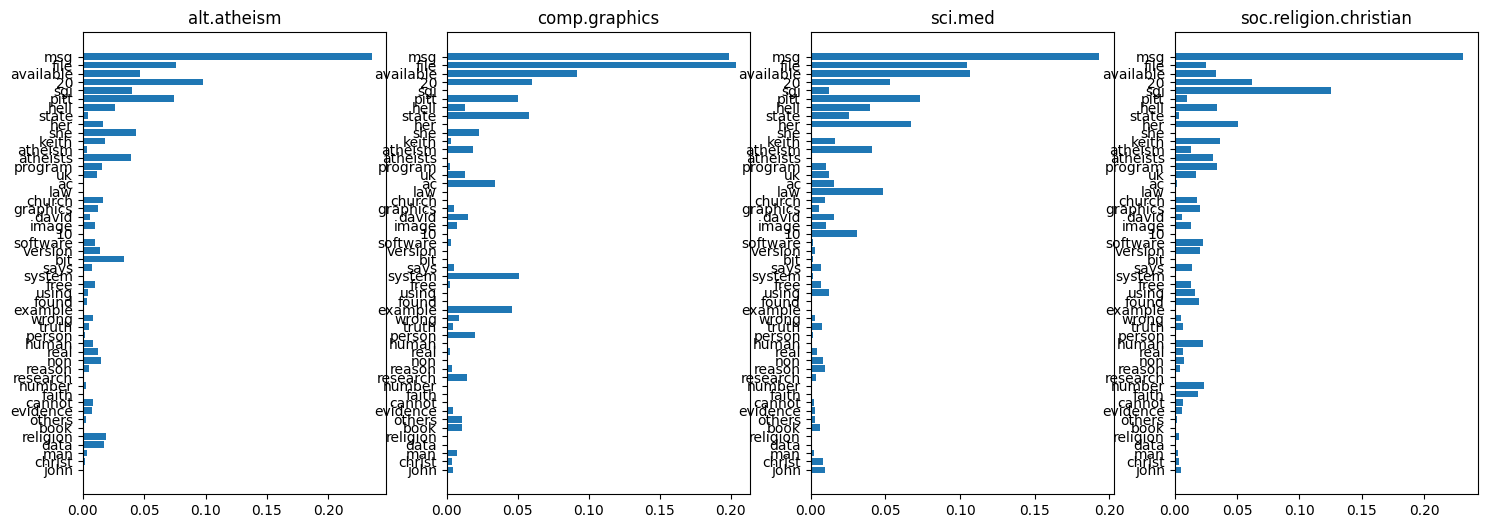

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (18, 6))

for cls, ax in zip(probabilities.index, axes):
  ax.set_title(cls)
  labels = probabilities.columns.tolist()
  values = probabilities.loc[cls].values
  ax.barh(labels, values)

Calculamos el *prior*, es decir, la proporción de e-mails que hay de cada clase.

In [ ]:
prior = df.groupby("class").size() / df.shape[0]
prior

class
alt.atheism               0.25
comp.graphics             0.25
sci.med                   0.25
soc.religion.christian    0.25
dtype: float64

Para clasificar una muestra, seguiríamos un proceso análogo al utilizado en el método anterior, teniendo en cuenta que el *Likelihood* que utilizabamos antes, ahora sería la probabilidad de que una de las palabras aparezca en la muestra.

Por ejemplo, si entra un email nuevo:

```
I believe in Jesus
```

La palabras `I` e `in` no la estamos considerando por ser demasiado comunes.

$P(believe|alt.atheism) = 0.049$

##### Multinomial Naïve Bayes en scikitlearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB

y = twenty_train.target

# Dividimos el dataset en entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.20, random_state = 0, stratify=y)

# Construimos el modelo y lo entrenamos con el método fit
gnb = MultinomialNB()

gnb.fit(np.array(X_train), y_train)

# Predecimos con el estimador entrenado
y_pred_train = gnb.predict(np.array(X_train))
y_pred = gnb.predict(np.array(X_val))

# Calculámos el accuray en entrenamiento y en validación

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)

print(f"Accuracy train: {acc_train * 100:.2f}%")
print(f"Accuracy val: {acc_val * 100:.2f}%")


Accuracy train: 72.24%
Accuracy val: 70.80%


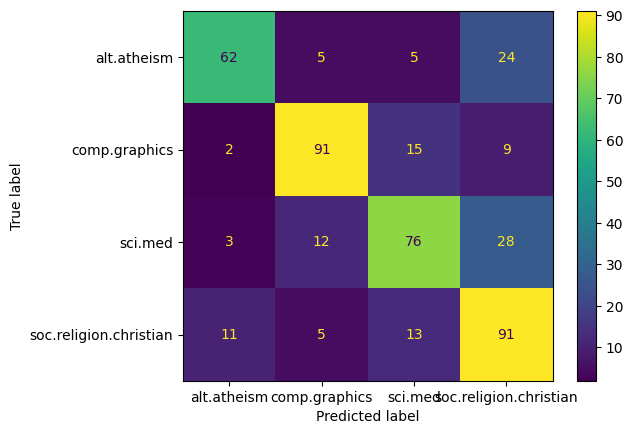

In [ ]:
y_val_pred = gnb.predict(np.array(X_val))

cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=twenty_train.target_names)

disp.plot()
plt.show()

##### Ejercicio

- Utilizando el dataset descargado, modificar los parametros del `CountVectorizer` para obtener un modelo mejor que el del ejemplo.

- Descargar el dataset con más categorías y evaluar el accuracy del modelo.

## Support Vector Machines (SVM)

### Descripción

Las máquinas de vector soporte (support vector machines, SVM en inglés) son un conjunto de algoritmos utilizados para el aprendizaje supervisados. Su caso de uso típico es clasificación, pero también existen implementaciones para regresión.

La base del algoritmo es definir un hiperplano que separe las muestras de manera que se maximice el margen entre las muestras de distintas clases. Las muestras que quedan en el margen son las denominadas vector soporte.

Las nuevas muestras serán por tanto clasificadas en función del lado en que queden con respecto al hiperplano definido en el entrenamiento.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/926px-SVM_margin.png" width="300px"></img>

La __función de coste__ que se intenta minimizar en el entrenamiento es una aproximación linear de la función de coste de una regresión logística, y se puede expresar de la siguiente manera:

$L(\theta_i) = \sum y_i \max(0, 1 - \theta_ix) + (1 - y_i) max(0, 1 + \theta_ix)$

Generalmente además del coste por clasificación, se añade un término de __regularización__ que se controla mediante el parámetro $C$.

$L(\theta_i) = C \sum y_i \max(0, 1 - \theta_ix) + (1 - y_i) max(0, 1 + \theta_ix) + \frac{1}{2} \sum \theta_i^2$

El factor C multiplica al error por clasificación por lo que cuanto mayor es su valor menos regularizado queda el modelo, es decir, más tendencia al overfit tiene el modelo pero más poder de aprendizaje.

Los valores típicos del parámetro C suelen estar desde 0.1 hasta 100.

### Kernel trick

El algoritmo básico de las máquinas de vector soporte, como hemos visto, es lineal, es decir la __frontera de decisión__ que define sólo puede formar una __linea recta__.

Para poder clasificar datos que no pueden ser separados linealmente, como los del ejemplo de la imagen, se utiliza una técnica denominada *kernel trick*.


<img src="https://miro.medium.com/max/1676/1*mCwnu5kXot6buL7jeIafqQ.png" width="500px"></img>

Con este método el espacio original de las variables es mapeado a un espacio de dimensionalidad mayor, dónde las muestras pueden ser separadas por un hiperplano lineal. Cuando representemos la frontera en el espacio original, esta frontera de decisión ya no será lineal.

Esto se puede conseguir con distintas proyecciones pero las más comunes son el kernel polinímico y el kernel radial gaussiano.

#### Linear kernel

Cuando no se hace ningun mapeo se denomina *kernel lineal* y, como hemos visto, la frontera de decisión es lineal.

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png"></img>

#### Polynomial Kernel

El kernel polinómico realiza un aumento dimensional mapeando cada par de muestras con una transformación polinómica de grado $d$.

$k(x_i, x_j) = (x_i x_j)^d$

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_002.png"></img>

#### Radial basis function kernel (rbf)

$k(x_i, x_j) = \gamma \exp(||x_i x_j ||^2)$

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png"></img>

El parametro $\gamma$ controla el radio de influencia del kernel en cada muestra. A mayor valor de $gamma$ el modelo tiende al overfit. Si $gamma$ es muy pequeño el modelo puede sufrir problemas para representar correctamente la forma de los datos.

### Ejemplo de utilización

In [ ]:
def plot_decision(ax, estimator, min_x, max_x, min_y, max_y, num = 100):
  """ Pinta la frontera de decisión de una clasificación en matplotlib.
  Args:
    ax (Axes): Objeto Axes de matplotlib.
    estimator (Estimator): Estimador de clasificación de sklearn.
    min_x (float): Mínimo valor de x que estimar.
    max_x (float): Máximo valor de x que estimar.
    min_y (float): Mínimo valor de y que estimar.
    max_y (float): Máximo valor de y que estimar.
    num (int): Número de muestras para el grid.
  """
  xx = np.linspace(min_x, max_x, num = num)
  yy = np.linspace(min_y, max_y, num = num)
  xx, yy = np.meshgrid(xx, yy)
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha = 0.4)

Para realizar el ejemplo vamos a utilizar el dataset `breast_cancer` del módulo `sklearn.datasets` de scikit learn.

Cada instancia del dataset representa ciertas características de un tumor, y el objetivo es clasificar si el tumor es benigno o maligno.

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
df = bunch_to_dataframe(dataset, "type")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Para ilustrar los conceptos que hemos visto vamos a utlizar únicamente las dos primeras características, lo que nos permitirá visualizar las fronteras de decisión para cada kernel.

In [ ]:
def plot_dataset(svc, ax):
  """
  """
  plot_decision(ax, svc, 0, 35, 0, 40)

  for target in (0, 1):

    ax.set_xlabel(dataset.feature_names[0])
    ax.set_ylabel(dataset.feature_names[1])
    ax.scatter(
        X[:, 0][y == target], X[:, 1][y == target],
        label = dataset.target_names[target], s = 50, alpha = 0.3
    )

In [ ]:
from sklearn.svm import SVC

X = dataset.data[:, :2]
y = dataset.target

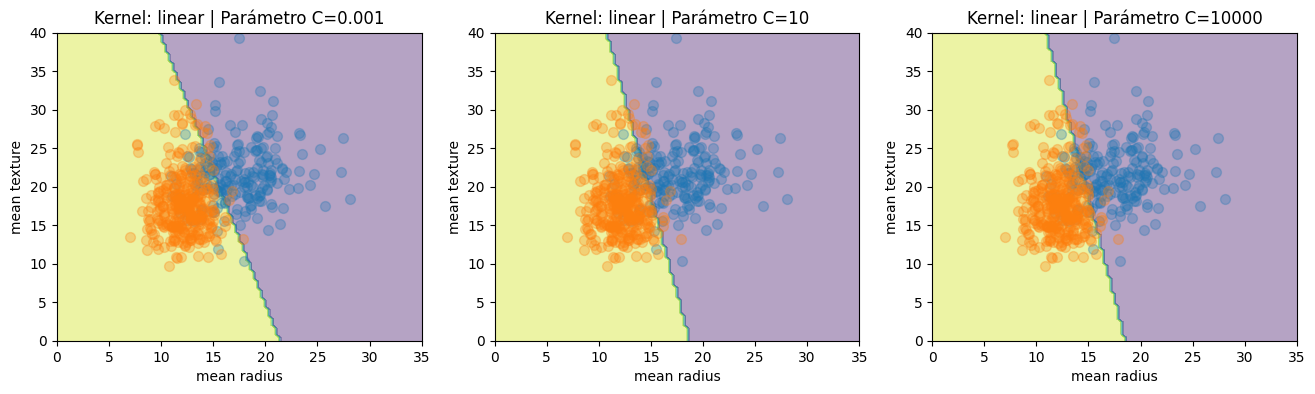

In [ ]:
parameters = [1e-3, 10, 10000]

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

kernel = 'linear'

for C, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = C).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)


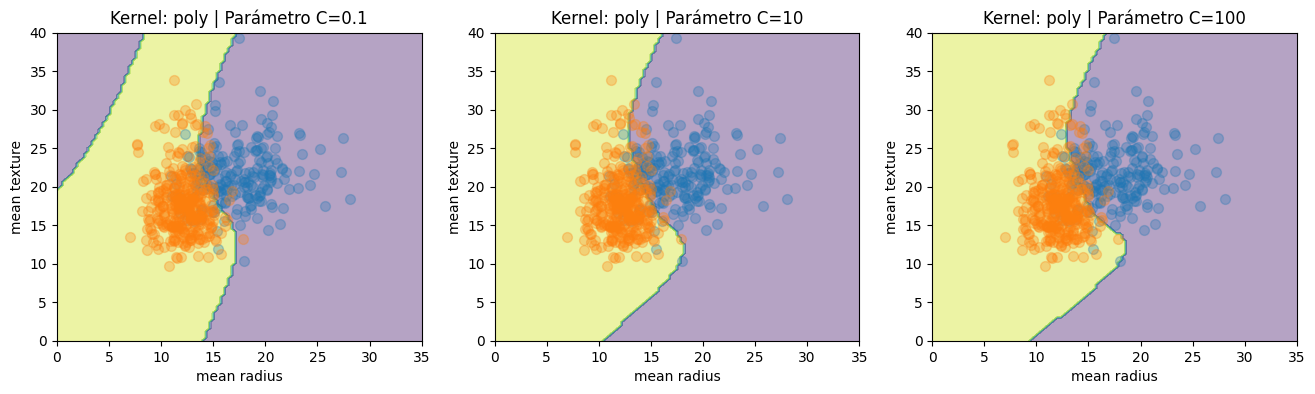

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.1, 10, 100]
kernel = 'poly'
for C, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = C, degree=5).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)

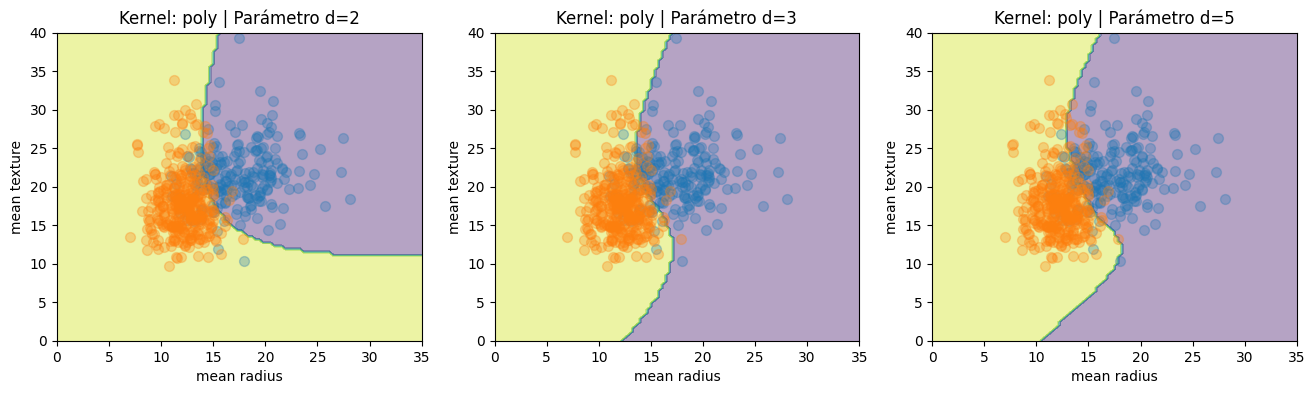

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [2, 3, 5]
kernel = 'poly'
for d, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = 10, degree=d).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro d={d}")
  plot_dataset(svc, ax)

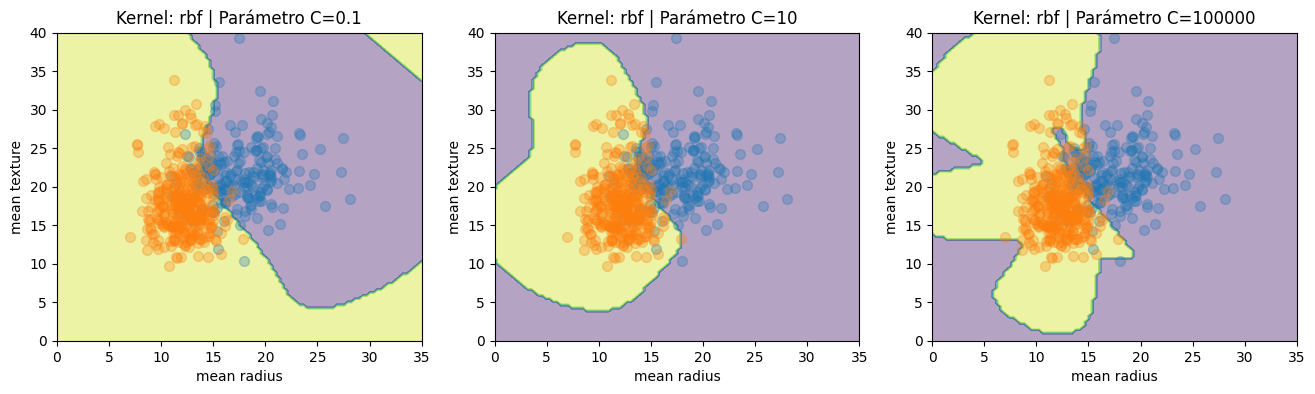

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.1, 10, 100000]
kernel = 'rbf'
for C, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = C).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)

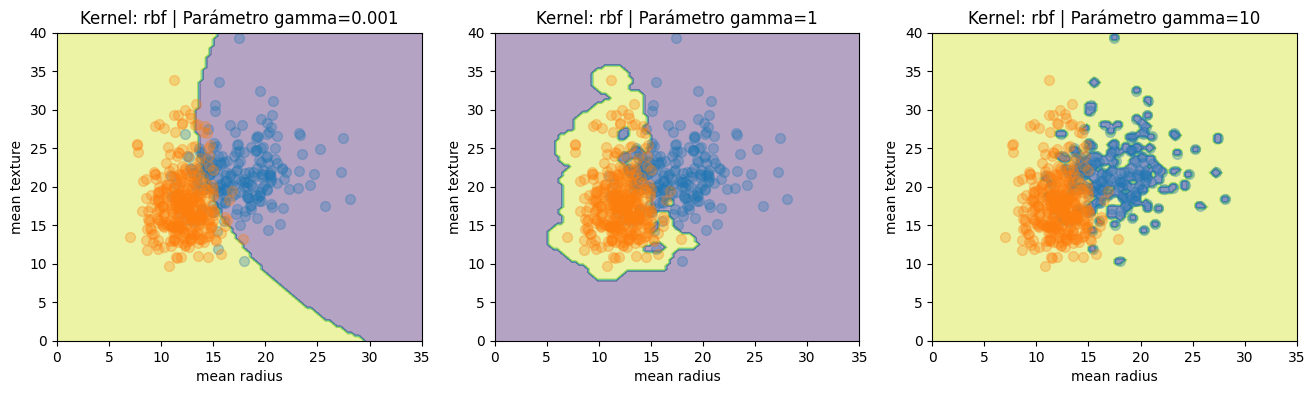

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.001, 1, 10]
kernel = 'rbf'
for g, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = 10, gamma = g).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro gamma={g}")
  plot_dataset(svc, ax)

### Ejercicio

Utilizando todas las variables disponibles en el dataset `breast_cancer`:
  - Dividir el dataset en sets de *train* y *test*.
  - Normalizar las variables de entrada. (Para ello se puede utilizar el transformador `sklearn.preprocessing.MinMaxScaler`)
  - Entrenar tres algoritmos *SVM* utilizando los kernels que hemos visto, ajustando los hiperparámetros para obtener el clasificador más preciso en cada caso.
  - ¿Qué kernel funciona mejor? ¿Cuáles pueden ser las razones?


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# Cargamos los datos en memoria.
dataset = load_breast_cancer()

# Extraemos la matriz de atributos X, dónde cada fila es un tumor y cada columna
# una propiedad medida del mismo.
X = dataset.data

# Extraemos la variable objetivo o "etiqueta". Es una columna que indica: 0 si
# un tumor es benigno y 1 si un tumor es maligno.
y = dataset.target

- Divisón del dataset en train y test

In [ ]:
# Dividimos el dataset utilizando la función train_test_split
from sklearn.model_selection import train_test_split

# Elegimos un 20% de muestras como muestras de test. Es un valor habitual en
# datasets de pequeña dimensión. Fijamos la semilla aleatoria a 0, esto es una
# buena práctica que hace que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

* Normalizar las variables de entrada

In [ ]:
# En general es siempre recomendable normalizar las variables de entrada ya que
# afectan a los resultados del modelo (los modelos basados en árboles son una
# excepción). La mayoría de los modelos tienden a dar más importancias a
# las variables que tienen una escala mayor.

from sklearn.preprocessing import MinMaxScaler

# El escalado solo se debe entrenar (llamar al metodo fit) con el dataset de
# entrenamiento, sino se puede meter sesgo la estimación del accuracy del modelo.
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transformamos las matrices de atributos.
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

  - Entrenar tres algoritmos *SVM* utilizando los kernels que hemos visto, ajustando los hiperparámetros para obtener el clasificador más preciso en cada caso.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entrenamos un SVC con kernel lineal. Ojo que utilizamos los datos escalados
# tanto para entrenar commo para predecir.
linear = SVC(kernel = "linear", C = 10_000)
linear.fit(X_train_n, y_train)


# Una vez entrenado, predecimos y obtenemos las predicciones para el set de
# entrenamiento y el de predicción.
y_train_pred = linear.predict(X_train_n)
y_test_pred = linear.predict(X_test_n)

# Calculamos el accuracy en train y test.
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Linear Kernel: Accuracy train: {acc_train:.4f} | Accuracy test: {acc_test:.4f}")

Linear Kernel: Accuracy train: 0.9934 | Accuracy test: 0.9825


In [ ]:
# Repetimos lo mismo para el kernel 'poly' y rbf. Solo hay que cambiar la linea
# de definición del modelo.

polynomial = SVC(kernel = "poly", degree = 3)
polynomial.fit(X_train_n, y_train)

y_train_pred = polynomial.predict(X_train_n)
y_test_pred = polynomial.predict(X_test_n)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Polynomial Kernel: Accuracy train: {acc_train:.4f} | Accuracy test: {acc_test:.4f}")

Polynomial Kernel: Accuracy train: 0.9868 | Accuracy test: 0.9825


In [ ]:
rbf = SVC(kernel = "rbf", gamma = 0.2)
rbf.fit(X_train_n, y_train)
y_train_pred = rbf.predict(X_train_n)
y_test_pred = rbf.predict(X_test_n)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"RBF Kernel: Accuracy train: {acc_train:.4f} | Accuracy test: {acc_test:.4f}")

RBF Kernel: Accuracy train: 0.9692 | Accuracy test: 0.9561


  - ¿Qué kernel funciona mejor? ¿Cuáles pueden ser las razones?

Con la configuración de hiperparámetros que hemos elegidos parece que el kernel que mejor funciona es el `polynomial`, ya que es el que mejor *accuracy* obtiene en el set de test.

El kernel `lineal`y `polynomial` obtienen una precisión igual en el set de entrenamiento, sin embargo parece que el `polynomial` generaliza mejor ya que obtiene un mejor resultado en el set de test.

El kernel `rbf` sufre claramente de *overfit* ya que obtiene una precisión perfecta en el set de entrenamiento pero falla al generalizar al set de test, con un accuracy muy bajo. Esto puede ser debido a un valor muy alto del hiper-parámetro `gamma` que habría que disminuir.

## QR de evaluación de la sesión

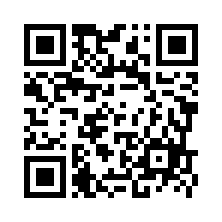

jorge.zaldivar.saiz@gmail.com